In [2]:
%matplotlib notebook

In [3]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [4]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])



In [5]:
Yearly_Data.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear


In [6]:
Yearly_Data["month"] =pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.month
Yearly_Data["month"]


0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
          ..
261524    12
261525    12
261526    12
261527    12
261528    12
261529    12
261530    12
261531    12
261532    12
261533    12
261534    12
261535    12
261536    12
261537    12
261538    12
261539    12
261540    12
261541    12
261542    12
261543    12
261544    12
261545    12
261546    12
261547    12
261548    12
261549    12
261550    12
261551    12
261552    12
261553    12
Name: month, Length: 3009575, dtype: int64

In [7]:
def fmonthofyear(x):
    return {
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
     }.get(x, "NA")



Yearly_Data["month_name"]= Yearly_Data["month"].apply(fmonthofyear)
Yearly_Data["month_name"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [27]:
month_group = Yearly_Data.groupby(Yearly_Data["month"]).size().reset_index(name='count')
month_group
x_axislist = (Yearly_Data["month"].unique()).tolist()
x_axislist
x_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']
x_list

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

<IPython.core.display.Javascript object>


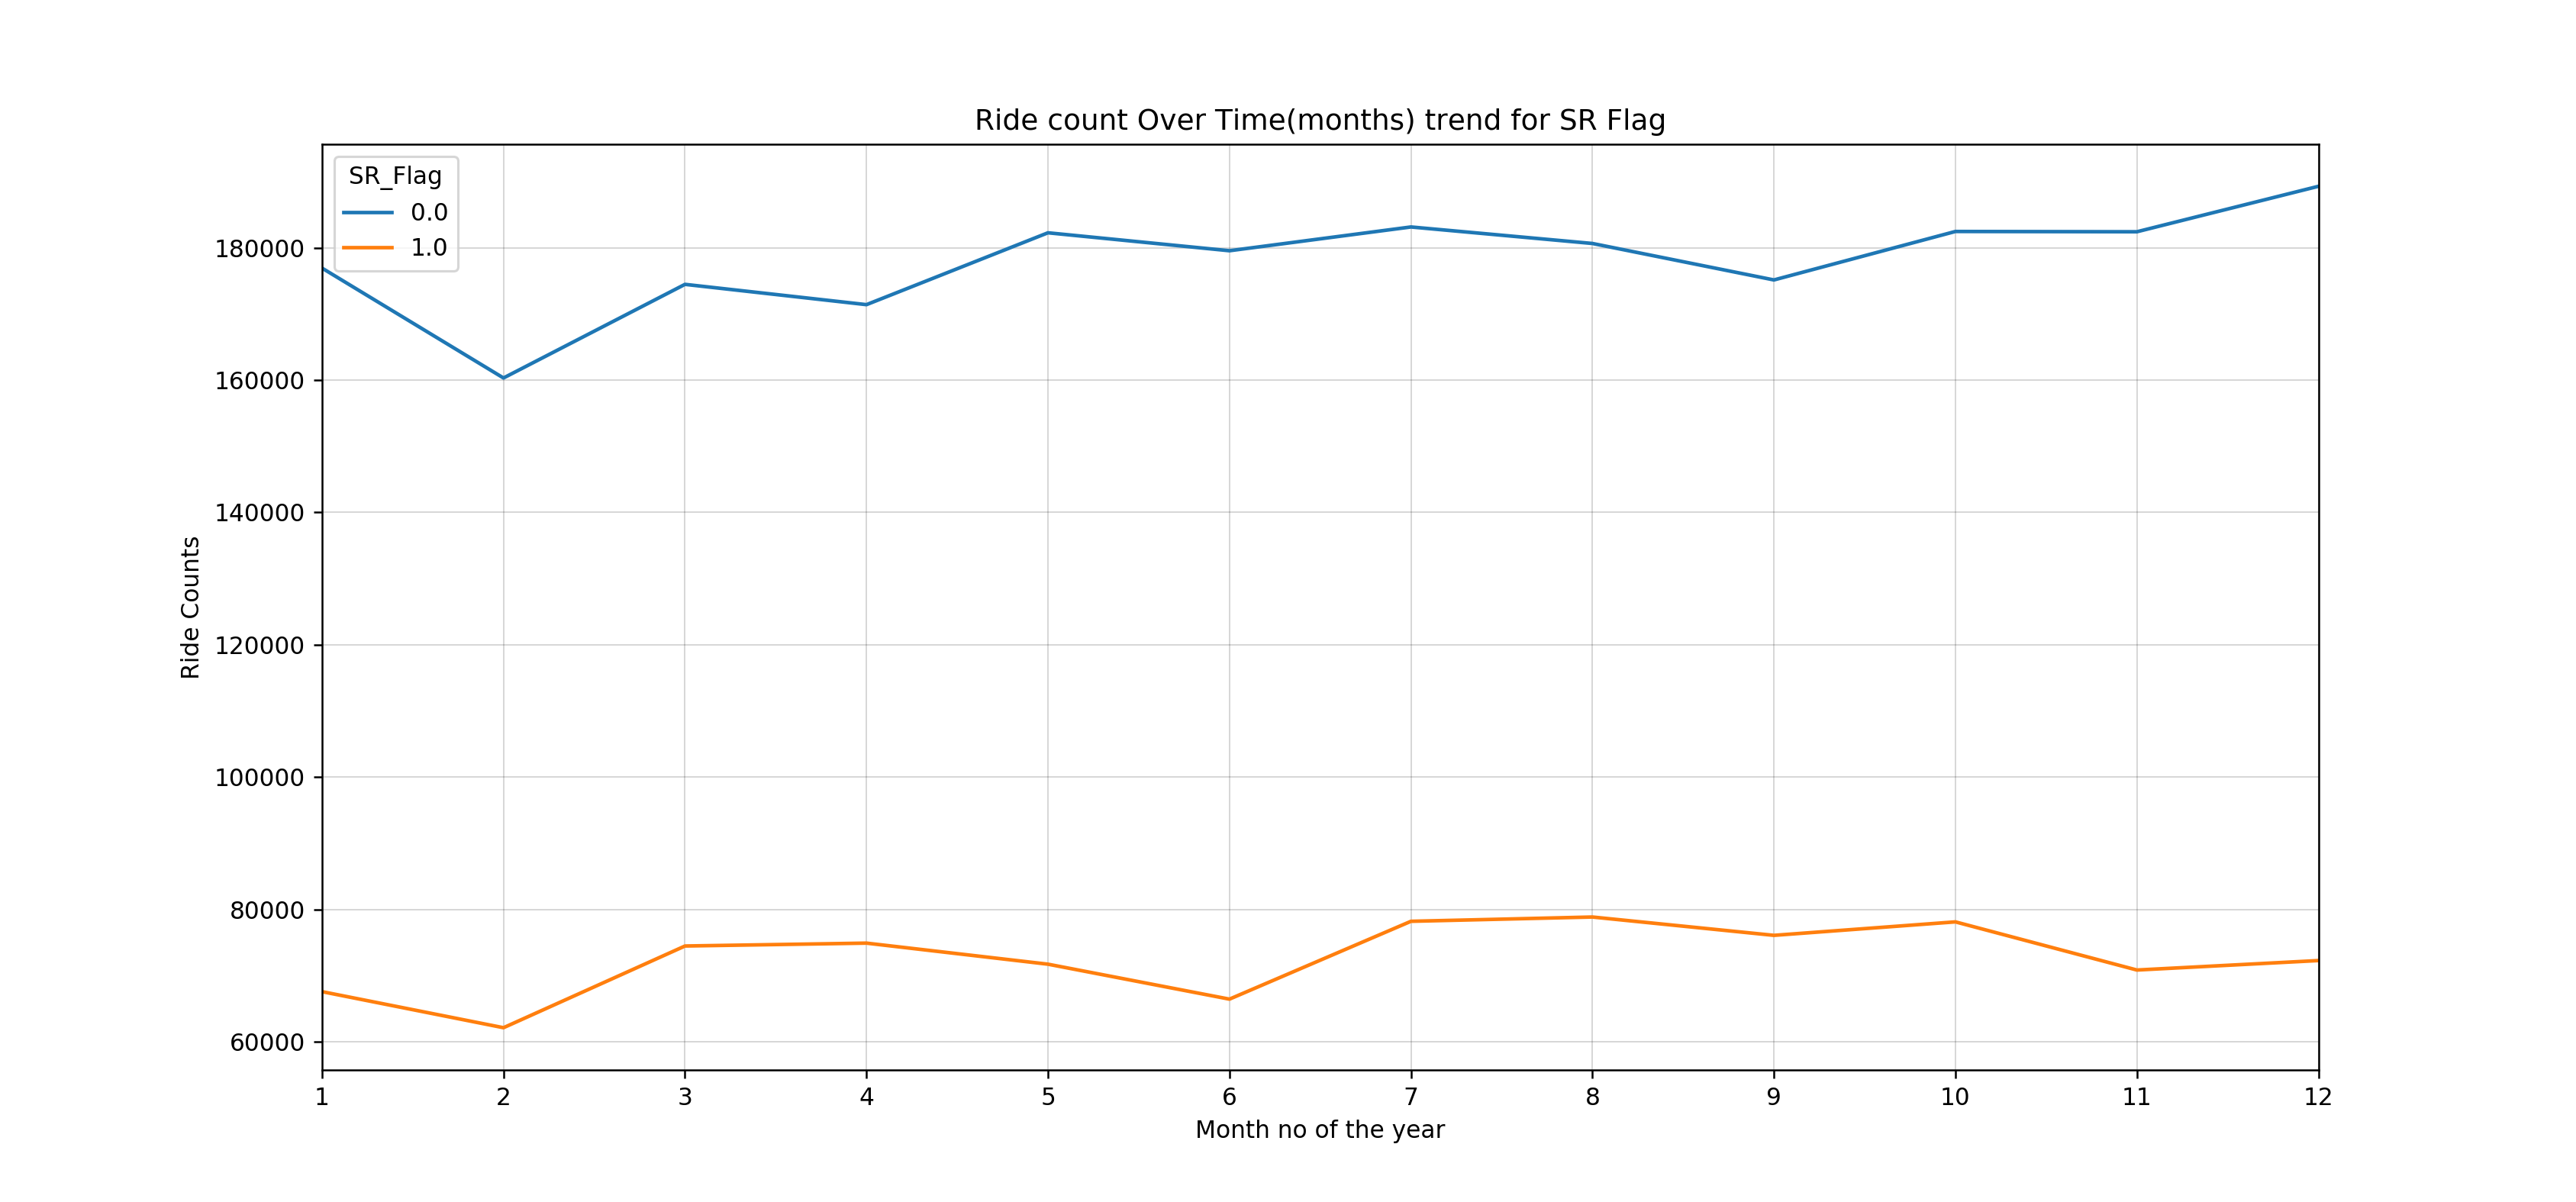

Text(0, 0.5, 'Ride Counts')

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
Yearly_Data.groupby(["month","SR_Flag"]).count()['Trip_Duration'].unstack().plot(ax=ax,xticks=x_axislist)
ax.grid(linestyle='-', linewidth='0.1', color='black')
ax.set_title("Ride count Over Time(months) trend for SR Flag")
ax.set_xlabel("Month no of the year")
ax.set_ylabel("Ride Counts")


<IPython.core.display.Javascript object>


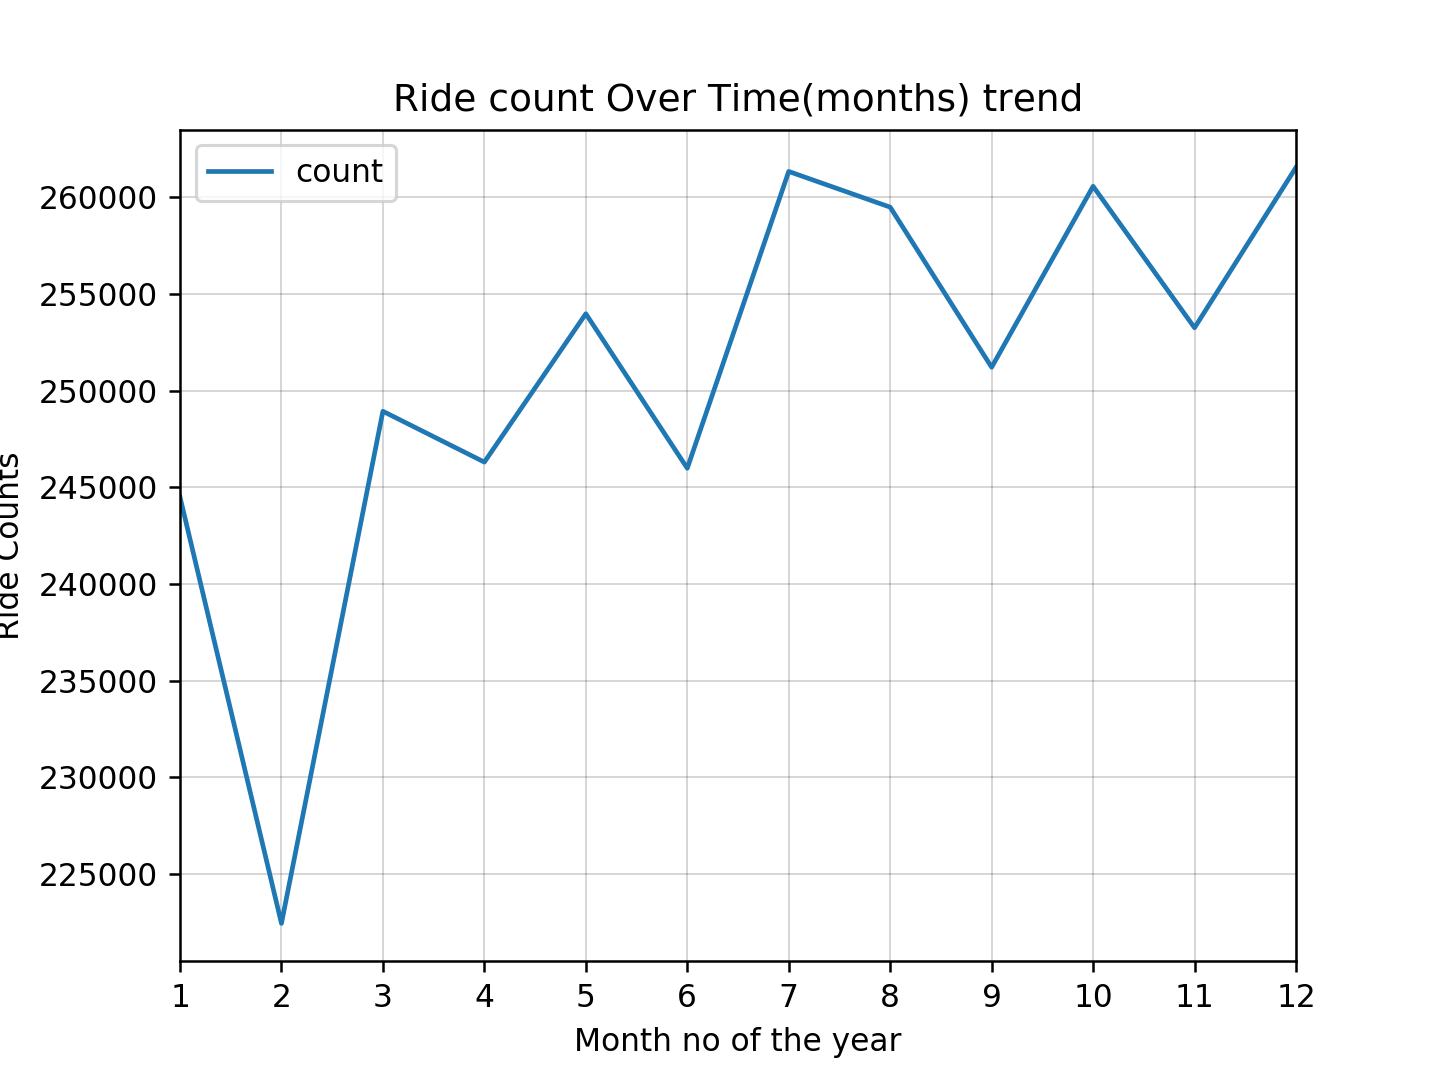

Text(0, 0.5, 'Ride Counts')

In [40]:
month_group.plot(x='month', y='count',xticks=x_axislist)
plt.grid(linestyle='-', linewidth='0.1', color='black')
plt.title("Ride count Over Time(months) trend")
plt.xlabel("Month no of the year")
plt.ylabel("Ride Counts")